In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsRegressor

In [2]:
csv = np.genfromtxt('C:/Users/Ood/Downloads/train.csv', delimiter=",", dtype = '1int,1int,S10,1float,1bool', names=True)
testcsv = np.genfromtxt('C:/Users/Ood/Downloads/test.csv', delimiter=",", dtype = '1int,1int,S10,1bool', names=True)

In [3]:
store = []*len(csv)
dept = []*len(csv)
date = []*len(csv)
sales = []*len(csv)
holiday = []*len(csv)
trainData = []*len(csv)
i = 0
while i < len(csv):
    store.append(csv[i][0])
    dept.append(csv[i][1])
    date.append(csv[i][2])
    sales.append(csv[i][3])
    holiday.append(csv[i][4])
    holidayInp = 1
    if csv[i][4]!=True:
        holidayInp = -1
    dateStr = str(csv[i][2]).split("-")
    dateInp = int(dateStr[1])+(int(dateStr[2][0:2])/100)
    trainData.append([store[i],dept[i],dateInp,holidayInp])
    i+=1

In [6]:
storeTest = []*len(csv)
deptTest = []*len(csv)
dateTest = []*len(csv)
salesTest = []*len(csv)
holidayTest = []*len(csv)
testData = []*len(csv)
j = 0
while j < len(testcsv):
    storeTest.append(testcsv[j][0])
    deptTest.append(testcsv[j][1])
    dateTest.append(testcsv[j][2])
    holidayTest.append(testcsv[j][3])
    holidayTestInp = 1
    if testcsv[j][3]!=True:
        holidayTestInp = -1
    dateTestStr = str(testcsv[j][2]).split("-")
    dateTestInp = int(dateTestStr[1])+(int(dateTestStr[2][0:2])/100)
    testData.append([storeTest[j],deptTest[j],dateTestInp,holidayTestInp])
    j+=1

In [5]:
neigh = KNeighborsRegressor(n_neighbors=7,weights='distance')
neigh.fit(trainData, sales)
KNeighborsRegressor(...)
# neigh.predict([[1,1,1207,1]])
# neigh.predict([trainData[5]])

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=Ellipsis, p=2,
          weights='uniform')

In [7]:
file_object = open("C:/Users/Ood/Desktop/kagglesubmit.csv","w")
file_object.write("Id,Weekly_Sales\n");
j = 0
while j<len(testcsv):
    writeStr = str(storeTest[j])+"_"+str(deptTest[j])+"_"+str(dateTest[j])[2:-1]+","+str(neigh.predict([testData[j]]))[1:-1]+"\n"
    file_object.write(writeStr)
    j+=1
file_object.close()

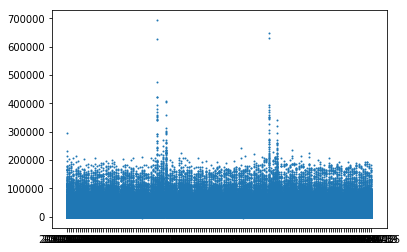

In [25]:
plt.scatter(date,sales, s=1.0)